<a href="https://colab.research.google.com/github/Jamolkhon5/TestPriject/blob/main/Mi_project_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave 
import numpy as np
from google.colab import files
from io import *
from PIL import Image
import matplotlib.pyplot as plt
 

In [69]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))

Saving dd45bf555fd4d854c7adc6b07f7d9a42.jpeg to dd45bf555fd4d854c7adc6b07f7d9a42 (2).jpeg


In [70]:
def processed_image(img):
  image = img.resize((256,256), Image.BILINEAR)
  image = np.array(image, dtype = float)
  size = image.shape
  lab = rgb2lab(1.0/255 * image)
  X, Y = lab[:, :, 0], lab[:, :, 1:]

  Y /=128
  X = X.reshape(1,size[0],size[1],1)
  Y = Y.reshape(1,size[0],size[1],2)
  return X, Y, size

In [71]:
X, Y, size = processed_image(img)

In [72]:
model = Sequential()
model.add(InputLayer(input_shape=(None,None,1)))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same', strides=2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same', strides=2))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same', strides=2))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Conv2D(2,(3,3),activation='tanh',padding='same'))
model.add(UpSampling2D((2,2)))



In [73]:
model.compile(optimizer='adam', loss = 'mse')
model.fit(x=X, y=Y, batch_size=1, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0549
Epoch 2/1000
1/1 [==============================] - 1s 920ms/step - loss: 0.6363
Epoch 3/1000
1/1 [==============================] - 1s 928ms/step - loss: 1.0391
Epoch 4/1000
1/1 [==============================] - 1s 931ms/step - loss: 0.7058
Epoch 5/1000
1/1 [==============================] - 1s 933ms/step - loss: 0.1042
Epoch 6/1000
1/1 [==============================] - 1s 925ms/step - loss: 0.0273
Epoch 7/1000
1/1 [==============================] - 1s 931ms/step - loss: 0.0238
Epoch 8/1000
1/1 [==============================] - 1s 920ms/step - loss: 0.0226
Epoch 9/1000
1/1 [==============================] - 1s 948ms/step - loss: 0.0217
Epoch 10/1000
1/1 [==============================] - 1s 923ms/step - loss: 0.0197
Epoch 11/1000
1/1 [==============================] - 1s 925ms/step - loss: 0.0218
Epoch 12/1000
1/1 [==============================] - 1s 931ms/step - loss: 0.0183
Epoch 13/1000
1/1 [=========

In [77]:
upl = files.upload()

Saving 123.jpg to 123 (6).jpg


In [78]:
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X,Y,size = processed_image(img)

1/1 [==============================] - 1s 646ms/step


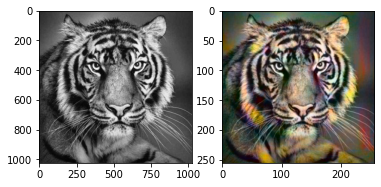

In [79]:
output = model.predict(X)
output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:, :, 0] = np.clip(X[0][:, :, 0], 0, 100)
cur[:, :, 1:] = ab 
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(lab2rgb(cur))
